## Assignment

In this assignment, you'll be working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above. 

Access this data from the Thinkful database using the following credentials:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?


In [1]:
import pandas as pd
import numpy as np 
import pandas_profiling
from sqlalchemy import create_engine
import warnings 

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [43]:
edu = edu.sort_values(['STATE','YEAR'])

In [102]:
edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
52,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,NaN,NaN,NaN,NaN
104,1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,56773.0,59165.0,41730.0,468472.0,201285.0,678808.0,NaN,NaN,NaN,NaN
157,1995_ALABAMA,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,56486.0,59914.0,40981.0,470246.0,206840.0,686410.0,NaN,NaN,NaN,NaN
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441


### 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [46]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [5]:
edu.isnull().sum()/edu.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

### 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

Replace missing values by mean for all variables except for AVG_MATH_4_SCORE, AVG_MATH_8_SCORE, AVG_READING_4_SCORE, and AVG_READING_8_SCORE due to large amount of missing values and they indicate student performance. I will leave them as is.

In [47]:
#replace missing values by overall mean
edu2 = edu.copy()


fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    edu2[col].fillna(edu2[col].mean(), inplace=True)

In [48]:
edu2.isnull().sum()/edu.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.000000
TOTAL_REVENUE                   0.000000
FEDERAL_REVENUE                 0.000000
STATE_REVENUE                   0.000000
LOCAL_REVENUE                   0.000000
TOTAL_EXPENDITURE               0.000000
INSTRUCTION_EXPENDITURE         0.000000
SUPPORT_SERVICES_EXPENDITURE    0.000000
OTHER_EXPENDITURE               0.000000
CAPITAL_OUTLAY_EXPENDITURE      0.000000
GRADES_PK_G                     0.000000
GRADES_KG_G                     0.000000
GRADES_4_G                      0.000000
GRADES_8_G                      0.000000
GRADES_12_G                     0.000000
GRADES_1_8_G                    0.000000
GRADES_9_12_G                   0.000000
GRADES_ALL_G                    0.000000
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [103]:
edu2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
52,1993_ALABAMA,ALABAMA,1993,727716.000000,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,NaN,NaN,NaN,NaN
104,1994_ALABAMA,ALABAMA,1994,730004.000000,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,56773.0,59165.0,41730.0,468472.0,201285.0,678808.0,NaN,NaN,NaN,NaN
157,1995_ALABAMA,ALABAMA,1995,727480.000000,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,56486.0,59914.0,40981.0,470246.0,206840.0,686410.0,NaN,NaN,NaN,NaN
209,1996_ALABAMA,ALABAMA,1996,735912.000000,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441


### 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.

Considering year as the grouping variable, the method remains the same except that I replace missing values by the mean of that year. 

In [53]:
#replace missing values by mean of that year
#by state should be more appropriate 
edu3 = edu.copy()

for col in fill_list:
    edu3[col] = edu3[col].fillna(edu3.groupby('STATE')[col].transform('mean'))

In [54]:
#Not all missing values are replaced, indicating data are missing in the entire year for some variables. 
#Same issue applies to by state.  
#Hobson: how to deal with this issue? There will still be missing afterwards. 
#Does it mean this method is inappropriate in this case?  drop the remaining missing values
edu3.isnull().sum()/edu3.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.107909
TOTAL_REVENUE                   0.107909
FEDERAL_REVENUE                 0.107909
STATE_REVENUE                   0.107909
LOCAL_REVENUE                   0.107909
TOTAL_EXPENDITURE               0.107909
INSTRUCTION_EXPENDITURE         0.107909
SUPPORT_SERVICES_EXPENDITURE    0.107909
OTHER_EXPENDITURE               0.107909
CAPITAL_OUTLAY_EXPENDITURE      0.107909
GRADES_PK_G                     0.027480
GRADES_KG_G                     0.002681
GRADES_4_G                      0.002681
GRADES_8_G                      0.002681
GRADES_12_G                     0.002681
GRADES_1_8_G                    0.002681
GRADES_9_12_G                   0.002681
GRADES_ALL_G                    0.027480
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [55]:
edu3.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,736584.333333,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
52,1993_ALABAMA,ALABAMA,1993,727716.000000,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,NaN,NaN,NaN,NaN
104,1994_ALABAMA,ALABAMA,1994,730004.000000,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,56773.0,59165.0,41730.0,468472.0,201285.0,678808.0,NaN,NaN,NaN,NaN
157,1995_ALABAMA,ALABAMA,1995,727480.000000,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,56486.0,59914.0,40981.0,470246.0,206840.0,686410.0,NaN,NaN,NaN,NaN
209,1996_ALABAMA,ALABAMA,1996,735912.000000,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441


In [26]:
edu.groupby(['YEAR']).count().head()

,PRIMARY_KEY,STATE,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,
1992,56,56,0,51,51,51,51,51,51,51,...,56,56,56,56,56,54,42,42,40,8
1993,56,56,51,51,51,51,51,51,51,51,...,56,56,56,56,56,54,0,0,0,0
1994,56,56,51,51,51,51,51,51,51,51,...,56,56,56,56,56,54,0,0,0,0
1995,56,56,51,51,51,51,51,51,51,51,...,56,56,56,56,56,54,0,0,0,0
1996,57,57,51,51,51,51,51,51,51,51,...,57,57,57,57,57,55,44,41,40,38


In [28]:
edu.groupby(['STATE']).count().head()

,PRIMARY_KEY,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,26,26,24,25,25,25,25,25,25,25,...,24,24,24,24,24,24,11,11,11,10
ALASKA,26,26,24,25,25,25,25,25,25,25,...,24,24,24,24,24,24,9,9,8,11
AMERICAN_SAMOA,22,22,0,0,0,0,0,0,0,0,...,14,14,14,14,14,14,0,0,0,0
ARIZONA,26,26,24,25,25,25,25,25,25,25,...,24,24,24,24,24,24,11,11,11,11
ARKANSAS,26,26,24,25,25,25,25,25,25,25,...,24,24,24,24,24,24,11,11,11,11


### 4. This time, fill in the missing values using interpolation (extrapolation).

In [98]:
#the dataset is sorted by state and year
#first, forward fill all missing values 
#then, backward fill all missing values 
#this seems to be the best approach. 

edu4 = edu.copy()
edu5 = edu4.ffill()
edu6 = edu5.bfill()

In [99]:
edu6.isnull().sum()/edu5.isnull().count()

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

### 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In looking at median, replacing missing values by the mean of that year yields the statistics most similar to the original dataset.

In [ ]:
#Hobson: how to determine which approach is more appropriate? 
#look at the data
#create a 2nd col to check interpolation method about first and last row of blanks

In [101]:
#edu.sort_values(['STATE','YEAR']).head(50)

In [104]:
for col in fill_list:
    print("Statistics for: {}".format(col))
    out = pd.DataFrame(pd.concat([edu[col], edu2[col],
                     edu3[col], edu6[col]], axis=1).describe())
    out.columns = [['Orig', 'Overall Mean', 'State Mean', 'Interpolation']]
    print(out)

Statistics for: ENROLL
               Orig  Overall Mean    State Mean Interpolation
count  1.229000e+03  1.492000e+03  1.331000e+03  1.492000e+03
mean   9.159308e+05  9.159308e+05  9.160580e+05  9.363089e+05
std    1.065280e+06  9.667725e+05  1.064834e+06  1.053667e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.569087e+05  2.448585e+05
50%    6.483130e+05  8.204140e+05  6.490130e+05  6.625380e+05
75%    1.014528e+06  9.211780e+05  1.010687e+06  1.230857e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for: TOTAL_REVENUE
               Orig  Overall Mean    State Mean Interpolation
count  1.280000e+03  1.492000e+03  1.331000e+03  1.492000e+03
mean   9.092082e+06  9.092082e+06  9.092664e+06  1.028401e+07
std    1.174519e+07  1.087818e+07  1.171056e+07  1.338662e+07
min    4.656500e+05  4.656500e+05  4.656500e+05  4.656500e+05
25%    2.186305e+06  2.546261e+06  2.185332e+06  2.274566e+06
50%    5.079546e+

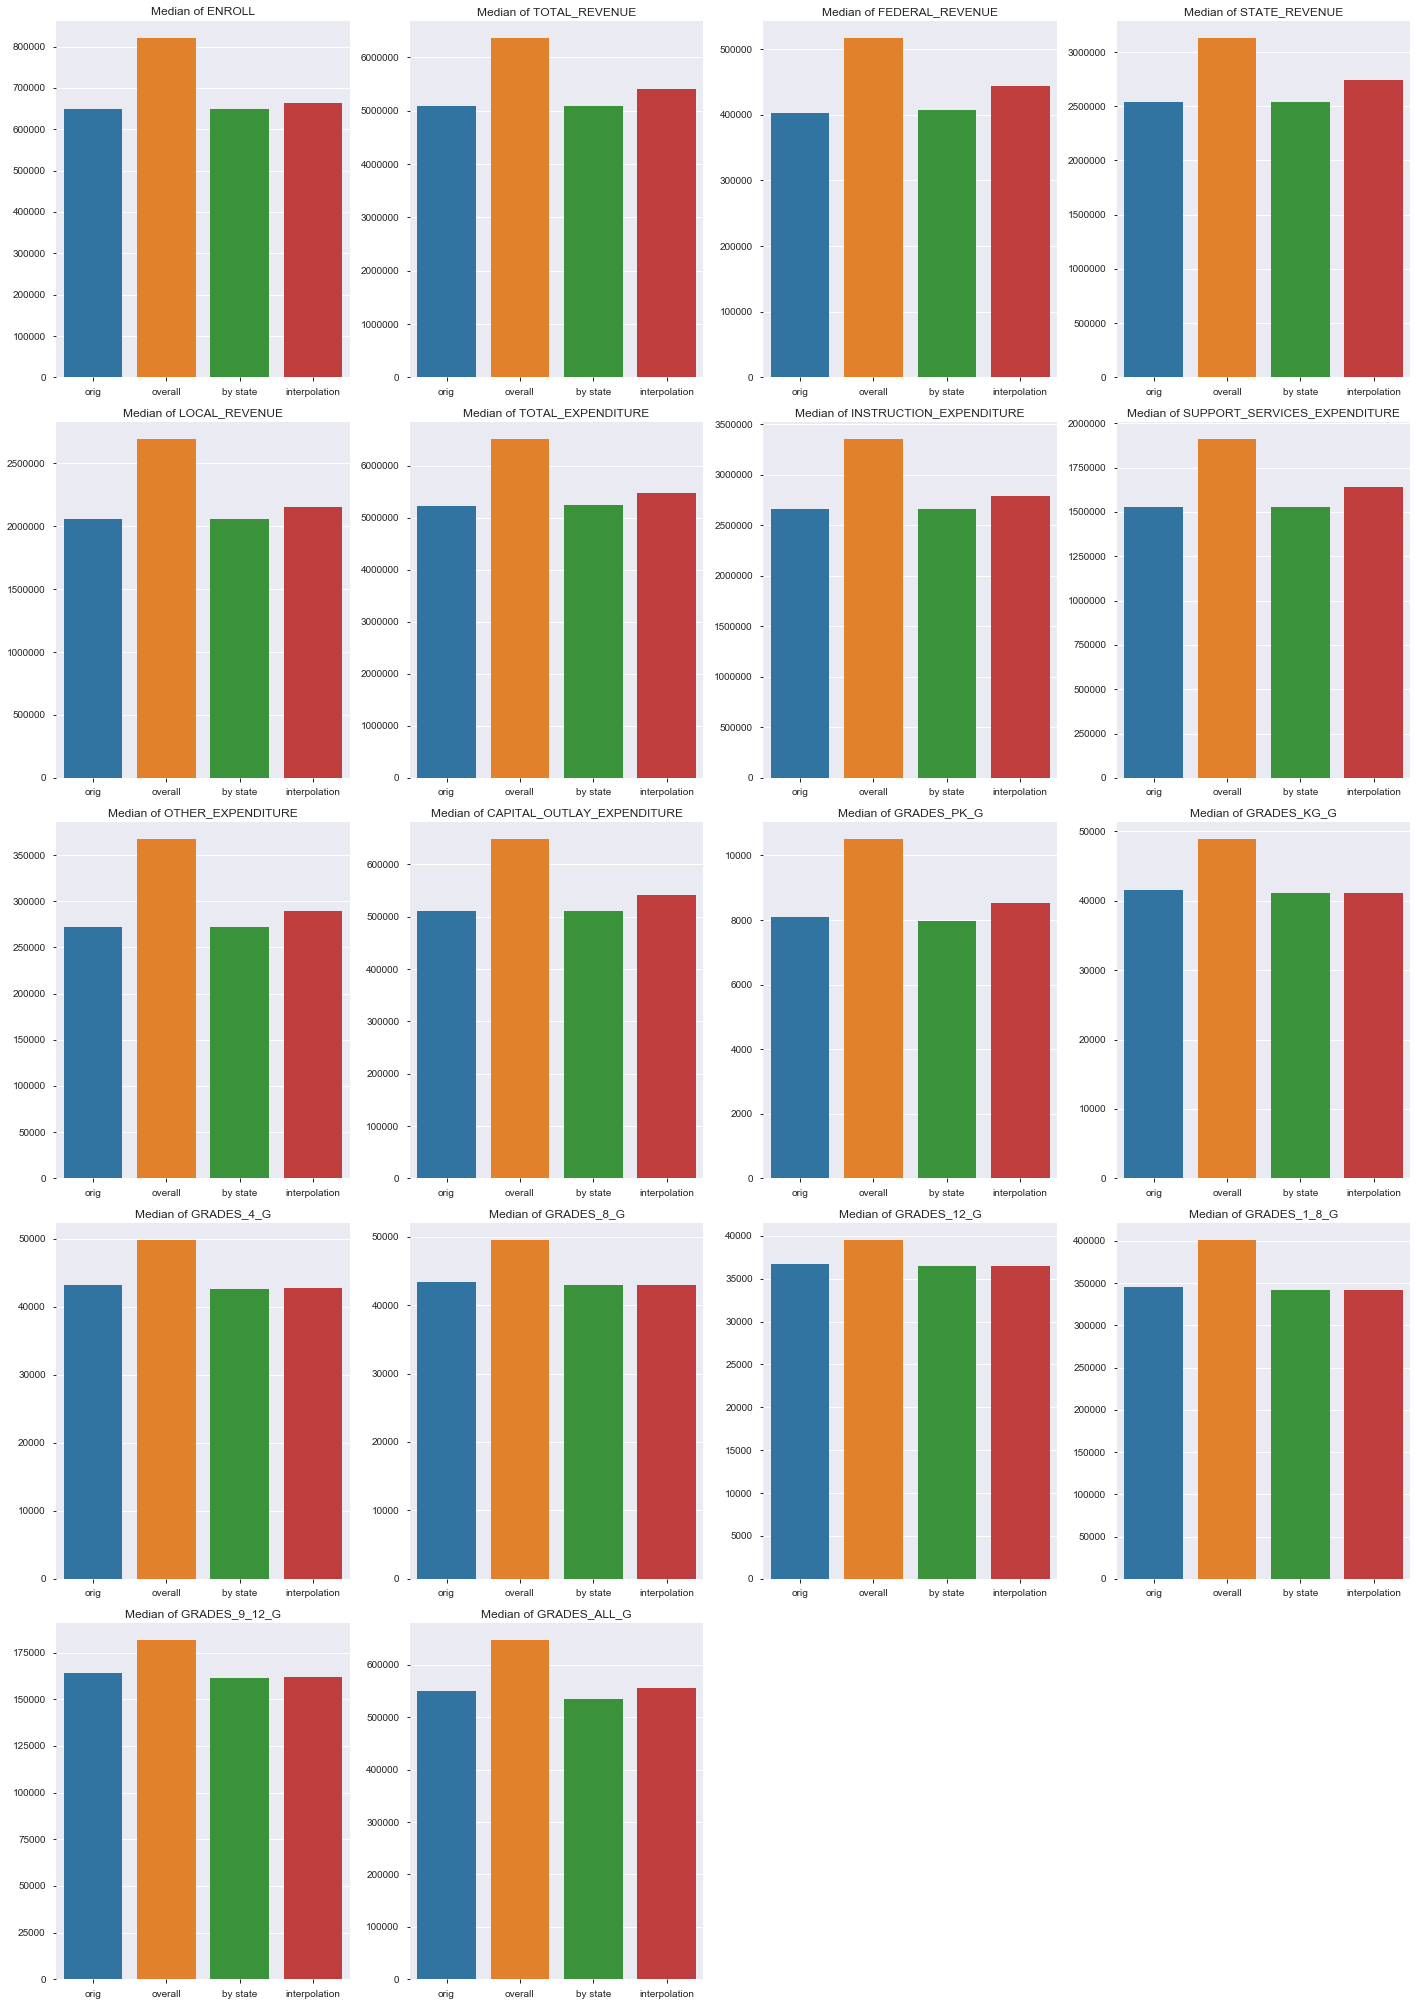

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    out = pd.concat([edu[col], edu2[col], edu3[col], edu6[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    
    sns.barplot(["orig", "overall", "by state", "interpolation"], out.median())
    plt.title("Median of {}". format(col))
    
plt.tight_layout()
plt.show()